In [40]:
from matplotlib import pyplot as plt
import csv
import pandas as pd
import networkx as nx
from collections import defaultdict

from utils import load_maps, load_df, display_dictionary, display_df

{'08186403BC13B0A688CA': {'name': 'alice in wonderland',
  'lat': 33.8132930507749,
  'long': -117.9182948308215},
 '01A126989313B0A7AA52': {'name': 'astro orbitor',
  'lat': 33.81202360459952,
  'long': -117.918256523726},
 '0EF77D74B213A7C4392B': {'name': 'autopia',
  'lat': 33.8125924,
  'long': -117.916365},
 '0E8EB1CD7613A7C4569F': {'name': 'buzz lightyear astro blasters',
  'lat': 33.81223840000001,
  'long': -117.9178289},
 '05DE65A65813B16F4EF9': {'name': "casey's jr train",
  'lat': 33.81371392734714,
  'long': -117.9191568933349},
 '016CB3B30A13A7C38243': {'name': "chip 'n dale treehouse",
  'lat': 33.8153253,
  'long': -117.9195743},
 '0CC239AEC813B172106A': {'name': "davy crockett's explorer canoes",
  'lat': 33.812481,
  'long': -117.922071},
 '0881FBFB6613B1743A40': {'name': 'disney gallery',
  'lat': 33.81024553687782,
  'long': -117.9186401620238},
 '01CF75336813B6B8962F': {'name': "donald's boat",
  'lat': 33.81514947861604,
  'long': -117.9187925266185},
 '029CF4E7CE1

In [3]:
df_edges.head(10)

,source_edge_id,target_edge_id
0,0BF5D5A0A713B6B6A081,05339F3E7F13B1740ECE
1,05339F3E7F13B1740ECE,0881FBFB6613B1743A40
2,0BF5D5A0A713B6B6A081,0EA01CB54313BC0B7CAA


In [26]:
RAIL_ROAD_ENTRANCE_ID = "0BF5D5A0A713B6B6A081"
MINNIES_HOUSE_ID = "0D8D702F9D13A7C3A0D4"
RAIL_ROAD_TOMORROWLAND_ID = "005DCC8A8413B6B56EFF"

In [14]:
# df[['lat', 'long'] ] = normalized_df[['lat', 'long'] ]

#rottation:
#x_new = -y
#y_new = x

df['rot_x'] = df['lat']
df['rot_y'] = df['long']

##ROTATE coordinates
df['tmp'] = df['rot_x']
df['rot_x'] = df['rot_y']
df['rot_y'] = df['tmp']


In [15]:
df.head(15)

,place_id,name,lat,long,rot_x,rot_y,tmp
0,08186403BC13B0A688CA,alice in wonderland,0.589989,0.701787,0.701787,0.589989,0.589989
1,01A126989313B0A7AA52,astro orbitor,0.364674,0.707342,0.707342,0.364674,0.364674
2,0EF77D74B213A7C4392B,autopia,0.465630,0.981598,0.981598,0.465630,0.465630
3,0E8EB1CD7613A7C4569F,buzz lightyear astro blasters,0.402798,0.769344,0.769344,0.402798,0.402798
4,05DE65A65813B16F4EF9,casey's jr train,0.664690,0.576795,0.576795,0.664690,0.664690
5,016CB3B30A13A7C38243,chip 'n dale treehouse,0.950693,0.516274,0.516274,0.950693,0.950693
6,0CC239AEC813B172106A,davy crockett's explorer canoes,0.445858,0.154272,0.154272,0.445858,0.445858
7,0881FBFB6613B1743A40,disney gallery,0.049085,0.651717,0.651717,0.049085,0.049085
8,01CF75336813B6B8962F,donald's boat,0.919487,0.629625,0.629625,0.919487,0.919487
9,029CF4E7CE13A7C139C8,dumbo the flying elephant,0.663177,0.608083,0.608083,0.663177,0.663177


In [30]:
RAIL_ROAD_ENTRANCE_ROW = df.loc[df['place_id'] == RAIL_ROAD_ENTRANCE_ID]
MINNIES_HOUSE_ROW = df.loc[df['place_id'] == MINNIES_HOUSE_ID]
RAIL_ROAD_TOMORROWLAND_ROW = df.loc[df['place_id'] == RAIL_ROAD_TOMORROWLAND_ID]

print(RAIL_ROAD_ENTRANCE_ROW)

                place_id                  name  lat      long     rot_x  \
39  0BF5D5A0A713B6B6A081  rail road - entrance  0.0  0.625922  0.625922   

    rot_y  tmp  
39    0.0  0.0  


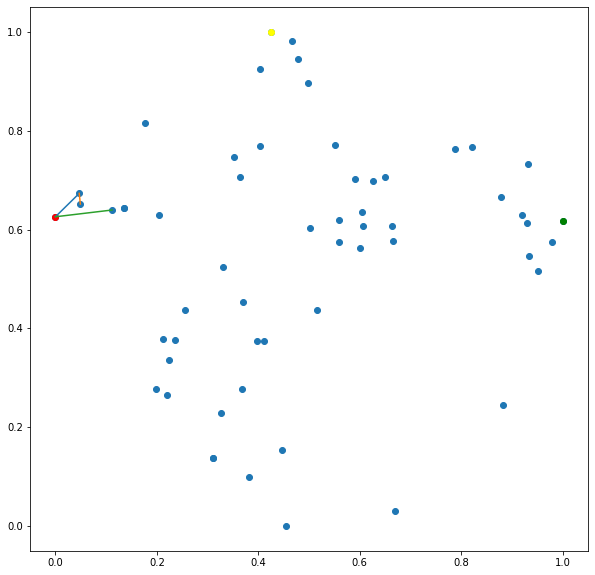

In [31]:
plt.figure(figsize=(10,10))
plt.scatter( df[['lat', ] ]  , df[['long']])

for row in df_edges.itertuples():
    
    #print(row)
    
    source_id, target_id = row[1], row[2]
    #print(source_id, target_id)
    
    source_coord = df.loc[df['place_id'] == source_id][['lat', 'long']]
    target_coord = df.loc[df['place_id'] == target_id][['lat', 'long']]
    
    #print( source_coord[['lat', 'long']].values[0] )
    
    plt.plot(  (source_coord['lat'].values[0],target_coord['lat'].values[0] ),
             (source_coord['long'].values[0],target_coord['long'].values[0] ) )

# plt.plot([ 0.236325,  0.224048 ], [0.376649, 0.335962] )

plt.scatter( (RAIL_ROAD_ENTRANCE_ROW['lat'].values[0] ,), (RAIL_ROAD_ENTRANCE_ROW['long'].values[0] ,) , color="red" )
plt.scatter( (MINNIES_HOUSE_ROW['lat'].values[0] ,), (MINNIES_HOUSE_ROW['long'].values[0] ,) , color="green" )
plt.scatter( (RAIL_ROAD_TOMORROWLAND_ROW['lat'].values[0] ,), (RAIL_ROAD_TOMORROWLAND_ROW['long'].values[0] ,) , color="yellow" )


plt.show()

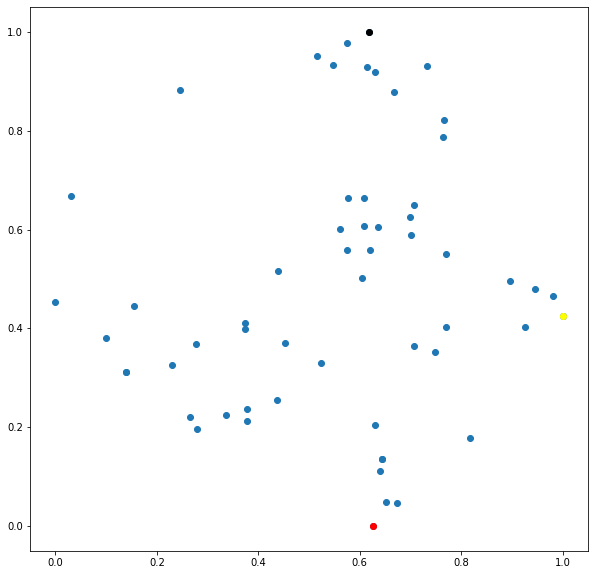

In [32]:
plt.figure(figsize=(10,10))

plt.scatter( df[['rot_x', ] ]  , df[['rot_y']])

plt.scatter( (RAIL_ROAD_ENTRANCE_ROW['rot_x'].values[0] ,), (RAIL_ROAD_ENTRANCE_ROW['rot_y'].values[0] ,) , color="red" )
plt.scatter( (MINNIES_HOUSE_ROW['rot_x'].values[0] ,), (MINNIES_HOUSE_ROW['rot_y'].values[0] ,) , color="black" )
plt.scatter( (RAIL_ROAD_TOMORROWLAND_ROW['rot_x'].values[0] ,), (RAIL_ROAD_TOMORROWLAND_ROW['rot_y'].values[0] ,) , color="yellow" )


plt.show()

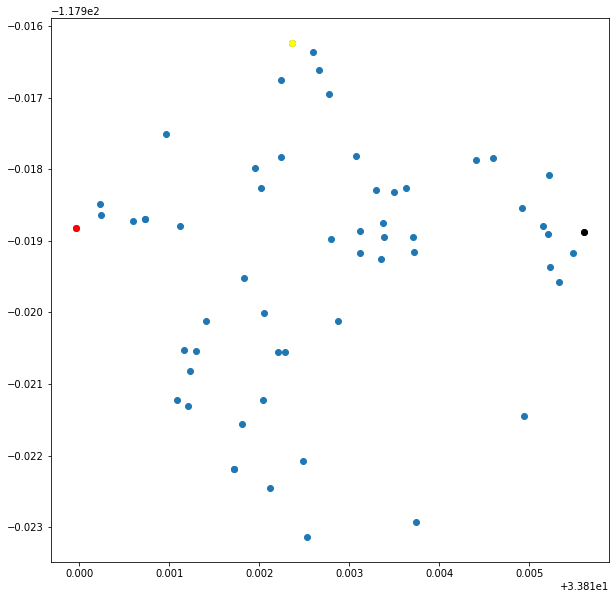

In [39]:

# attractions_map
display_map_v2(attractions_map)